<h1> Simple Linear Regression</h1>


<h5>Import required libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
plt.style.use('dark_background')

<h5>Import dataset

In [17]:
ds = "../datasets/simpleLinearRegression.csv"
data = pd.read_csv(ds)
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


<h5>Split the dataset


In [18]:
data = data.dropna()
X_train = np.array(data.x[0:500]).reshape(500,1)
y_train = np.array(data.y[0:500]).reshape(500,1)
X_test = np.array(data.x[500:700]).reshape(199, 1)
y_test = np.array(data.y[500:700]).reshape(199, 1)


<h5>Define linear regression model

In [19]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, X_train):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, X_train)+c
        return predictions

    def cost_function(self, predictions, y_train):
        cost = np.mean((y_train-predictions) ** 2)
        return cost

    def backward_propagation(self, X_train, y_train, predictions):
        derivatives = {}
        df = (predictions-y_train)
        dm = 2 * np.mean(np.multiply(X_train, df))
        dc = 2*np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - \
            learning_rate*derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - \
            learning_rate*derivatives['dc']

    def train(self, X_train, y_train, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1)*-1
        self.parameters['c'] = np.random.uniform(0, 1)*-1
        self.loss = []
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(X_train), max(X_train), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                       self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(X_train, y_train, marker='o',
                   color='#28fc03', label='Training Data')
        ax.set_ylim(0, max(y_train)+1)

        def update(frame):
            predictions = self.forward_propagation(X_train)
            cost = self.cost_function(predictions, y_train)
            derivatives = self.backward_propagation(
                X_train, y_train, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m']*x_vals+self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss={}".format(frame+1, cost))
            return line,
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('../outputs/simpleLinearRegression.gif', writer='ffmpeg', dpi=200, fps=5)
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.savefig('../outputs/simpleLinearRegression.png', dpi=200)
        plt.show()
    
        return self.parameters, self.loss

<h5>Train the model and give the final prediction

Iteration = 1, Loss=6078.295868559166
Iteration = 1, Loss=739.476079963697
Iteration = 1, Loss=96.0901850788364
Iteration = 2, Loss=18.555173217149676
Iteration = 3, Loss=9.211350725853906
Iteration = 4, Loss=8.085308656486252
Iteration = 5, Loss=7.9495985602898855
Iteration = 6, Loss=7.933234245295442
Iteration = 7, Loss=7.931252396720323
Iteration = 8, Loss=7.931003792852616
Iteration = 9, Loss=7.930964064818712
Iteration = 10, Loss=7.930949509580041
Iteration = 11, Loss=7.930937988921181
Iteration = 12, Loss=7.930926834946154
Iteration = 13, Loss=7.9309157261443595
Iteration = 14, Loss=7.930904623770171
Iteration = 15, Loss=7.93089352315422
Iteration = 16, Loss=7.930882423733701
Iteration = 17, Loss=7.930871325440684
Iteration = 18, Loss=7.930860228266891
Iteration = 19, Loss=7.930849132211223
Iteration = 20, Loss=7.930838037273443


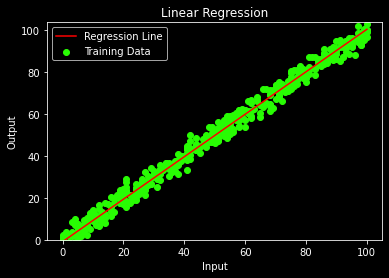

In [20]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(X_train, y_train, 0.0001, 20)